# Test: Data analyses 2

**Author:** Maxime ABITBOL 21305862     
**Teacher:** Franck LIN - ADD2

## 1. Exercise 1 (60%)

### Import

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

import random
random.seed(30)

import time 

### Settings

In [130]:
!pwd
!ls ../data/

/home/maxime/Documents/Study/M1/ADD2/Exam/Data-Analyses-ADD2/src
Faces_Test_Inputs.csv  Faces_Train_Inputs.csv  Uber_data.csv
Faces_Test_Labels.csv  Faces_Train_Labels.csv


In [131]:
PATH_DATA = "../data/"
PATH_TRAIN_X = PATH_DATA + "Faces_Train_Inputs.csv"
PATH_TRAIN_Y = PATH_DATA + "Faces_Train_Labels.csv"
PATH_TEST_X = PATH_DATA + "Faces_Test_Inputs.csv"
PATH_TEST_Y = PATH_DATA + "Faces_Test_Labels.csv"

### Load Data

In [132]:
df_train_x = pd.read_csv(PATH_TRAIN_X, sep=",", header=None)
df_train_y = pd.read_csv(PATH_TRAIN_Y, sep=",", header=None)
df_test_x = pd.read_csv(PATH_TEST_X, sep=",", header=None)
df_test_y = pd.read_csv(PATH_TEST_Y, sep=",", header=None)

### 1.1 Describe data & Face mean

Train y: 320 images, 40 people, 8 image of same people, dataset corresponding to the label

In [133]:
df_train_y.head()

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,1,1,1,1,1,1,1,1,2,2,...,39,39,40,40,40,40,40,40,40,40


Test y: 80 images, 40 people, 2 image of same people

In [134]:
df_test_y.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,1,1,2,2,3,3,4,4,5,5,...,36,36,37,37,38,38,39,39,40,40


Train x: 10304 pixels per images (92x112)

In [135]:
df_train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,0.18824,0.17647,0.17647,0.19216,0.18039,0.18431,0.17647,0.18431,0.18824,0.207840,...,0.18431,0.17255,0.18431,0.20392,0.18824,0.192160,0.176470,0.180390,0.18431,0.180390
1,0.23529,0.22745,0.26667,0.30980,0.19216,0.16863,0.20392,0.20392,0.21961,0.282350,...,0.14510,0.15686,0.14118,0.12549,0.12941,0.145100,0.141180,0.129410,0.12157,0.133330
2,0.15294,0.17255,0.23137,0.21176,0.24314,0.27059,0.29020,0.23922,0.17255,0.184310,...,0.15294,0.14510,0.13333,0.12157,0.12549,0.133330,0.109800,0.109800,0.10588,0.113730
3,0.24706,0.21961,0.20392,0.15686,0.16863,0.16863,0.11373,0.11765,0.11765,0.094118,...,0.16078,0.16078,0.13725,0.12549,0.10588,0.094118,0.090196,0.098039,0.10980,0.094118
4,0.25098,0.23529,0.24706,0.20784,0.23529,0.16078,0.11765,0.10980,0.14902,0.215690,...,0.15686,0.17255,0.15686,0.16863,0.16471,0.160780,0.160780,0.137250,0.16471,0.152940


In [136]:
df_train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Columns: 10304 entries, 0 to 10303
dtypes: float64(10304)
memory usage: 25.2 MB


Test x: 10305 pixels per images

In [137]:
df_test_x.head()

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,0.164706,0.160784,0.211765,0.188235,0.168627,0.156863,0.180392,0.176471,0.160784,0.160784,...,0.168627,0.156863,0.160784,0.164706,0.180392,0.164706,0.168627,0.156863,0.152941,0.160784
1,0.133333,0.137255,0.133333,0.133333,0.149020,0.141176,0.117647,0.105882,0.094118,0.105882,...,0.184314,0.172549,0.184314,0.168627,0.164706,0.149020,0.164706,0.160784,0.152941,0.129412
2,0.168627,0.149020,0.152941,0.145098,0.156863,0.160784,0.164706,0.168627,0.176471,0.152941,...,0.125490,0.125490,0.117647,0.109804,0.105882,0.098039,0.105882,0.109804,0.121569,0.552941
3,0.145098,0.121569,0.133333,0.149020,0.160784,0.156863,0.149020,0.164706,0.156863,0.152941,...,0.117647,0.121569,0.105882,0.098039,0.101961,0.090196,0.101961,0.105882,0.262745,0.521569
4,0.407843,0.407843,0.415686,0.419608,0.419608,0.423529,0.396078,0.419608,0.415686,0.407843,...,0.215686,0.227451,0.207843,0.215686,0.239216,0.243137,0.250980,0.247059,0.235294,0.219608


In [138]:
df_test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Columns: 10304 entries, 0 to 10303
dtypes: float64(10304)
memory usage: 6.3 MB


### Face mean (from train set)

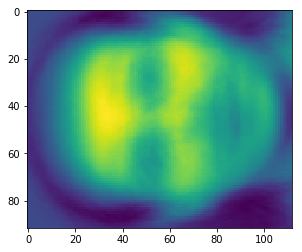

In [139]:
face_mean = np.mean(df_train_x)
matr_face_mean = np.reshape(face_mean.values, (92,112))
plt.imshow(matr_face_mean)

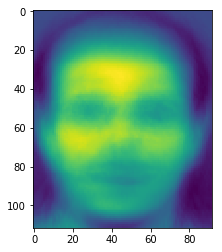

In [140]:
# to put the image in the right direction
plt.imshow(matr_face_mean.transpose())

### 1.2 PCA Reduction

In [141]:
from sklearn.preprocessing import StandardScaler

def my_PCA(k, X=df_train_x):
    sc= StandardScaler()
    Z=sc.fit_transform(X)
    pca = PCA(n_components=k)
    X_reduced = pca.fit_transform(Z)

    return X_reduced

print(df_train_x.shape)

(320, 10304)


Reduction with k=5

In [142]:
X_reduced5 = my_PCA(k=5)
X_reduced5.shape

(320, 5)

Reduction with k=10

In [143]:
X_reduced10 = my_PCA(k=10)
X_reduced10.shape

(320, 10)

Reduction with k=50

In [144]:
X_reduced50 = my_PCA(k=50)
X_reduced50.shape

(320, 50)

### 1.3 Plot image with PCA

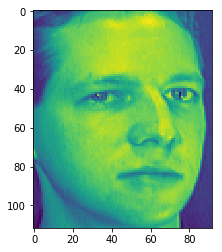

In [145]:
# test with the face number 5 without PCA
face5 = df_train_x.loc[4]
image5 = np.reshape(face5.values, (92,112))
plt.imshow(image5.transpose())

**Function that perform a PCA, rebuild the image and display it**

In [146]:
def PCAshow(k):
    pca = PCA(k)
    lower_dimension_data = pca.fit_transform(df_train_x) # PCA on data
    approximation = pca.inverse_transform(lower_dimension_data)  # Reconstruct Images
    face5pca = approximation[4] # Select Image 5
    image5pca = np.reshape(face5pca, (92,112)) # Image to Matrix 
    plt.imshow(image5pca.transpose()) # Plot image

**The same picture with a pca for k = 5**

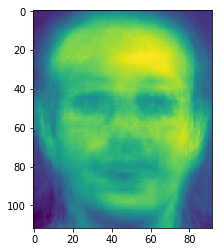

In [147]:
PCAshow(5)

**the same picture with a pca for k = 10**

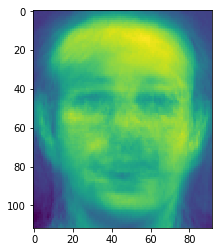

In [148]:
PCAshow(10)

**the same picture with a pca for k = 50**

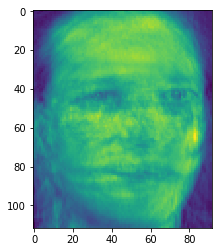

In [149]:
PCAshow(50)

### 1.4 How to accelerate PCA?

- Reduce the number of images to train (rows)
- Reduce the initial number of columns

### 1.5 Classification with K Nearest Neighborhood after PCA

### Implementation of KNN

In [150]:
def euclidean_dist(X_train_elm, elm):
    dist = np.sqrt(np.sum(pow(elm - X_train_elm, 2)))
    return dist

In [151]:
def find_nn(X_train, elm, k):
    dist_arr = {}
    
    for X_train_elm, i in zip(X_train.values, range(1, X_train.shape[0] + 1)):
        dist = euclidean_dist(X_train_elm, elm)        
        dist_arr[i] = dist

    arr_sort = sorted(dist_arr.items(), key=lambda kv: kv[1])
    
    return arr_sort[0:k]

In [152]:
def max_nn(k_nn, Y_train):
    index_nn = [tupl[0] - 1 for tupl in k_nn]
    
    #print(index_nn)
    
    
    k_nn_classe = Y_train[index_nn]
    k_nn_classe = np.ndarray.tolist(k_nn_classe)
    
    return max(k_nn_classe, key=k_nn_classe.count)

In [153]:
def my_knn(X_train, Y_train, X_test, k):
    Y_pred = []
    
    for elm in X_test.values:
        k_nn = find_nn(X_train, elm, k)
        classe = max_nn(k_nn, Y_train)
        Y_pred.append(classe)
        
    return Y_pred

### Test our KNN without PCA

In [154]:
# Get Y train values
Y_train = df_train_y.values.T
Y_train = Y_train.ravel()
# like: Y_train = Y_train.reshape(Y_train.shape[0], )

Y_test = df_test_y.values.T
Y_test = Y_test.ravel()

print("Shape of Y_train: {}\nShape of Y_test: {}".format(Y_train.shape, Y_test.shape))

Shape of Y_train: (320,)
Shape of Y_test: (80,)


In [155]:
Y_pred = my_knn(df_train_x, Y_train, df_test_x, 5)

In [156]:
_ = [print(elm, ' ', end='') for elm in Y_pred]

1  1  2  2  3  3  4  4  5  18  6  6  7  7  8  8  9  9  10  8  11  11  12  12  13  13  14  14  15  15  16  16  17  17  18  18  15  19  20  20  21  21  22  22  23  23  24  24  25  25  26  26  27  27  28  28  29  29  30  30  31  31  32  32  33  33  34  34  35  35  36  17  37  37  38  38  39  39  40  5  

In [157]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred) * 100, '%')

Accuracy: 93.75 %


### Test our KNN with PCA

In [158]:
def knn_pca(k_pca, k_knn, df_train_x, df_test_x):
    
    # Get reduced data before KNN
    X_train_reduced = my_PCA(k_pca, X=df_train_x)
    X_test_reduced = my_PCA(k_pca, X=df_test_x)
    # Launch the KNN
    Y_pred = my_knn(pd.DataFrame(X_train_reduced), Y_train, pd.DataFrame(X_test_reduced), k_knn)
    print("For a reduction dimension of {} and a k of {}, the accuracy is: {}%"
          .format(k_pca, k_knn, metrics.accuracy_score(Y_test, Y_pred) * 100))

In [159]:
knn_pca(50, 7, df_train_x, df_test_x)

For a reduction dimension of 50 and a k of 7, the accuracy is: 12.5%


In [160]:
knn_pca(10, 7, df_train_x, df_test_x)

For a reduction dimension of 10 and a k of 7, the accuracy is: 13.750000000000002%


In [161]:
knn_pca(5, 7, df_train_x, df_test_x)

For a reduction dimension of 5 and a k of 7, the accuracy is: 12.5%


-------------------------------------------------------------------------------------------------------------------
# <span style="color: #850606">A CONTROLER PAR DADOU</span>  
-------------------------------------------------------------------------------------------------------------------

In [162]:
def my_PCA2(k, X=df_train_x, Y=df_test_x):
    pca = PCA(n_components = k, svd_solver = 'full')
    data_pca_train = pca.fit_transform(X)
    data_pca_test  = pca.transform(Y)
    return(data_pca_train, data_pca_test)

In [163]:
def knn_pca(k_pca, k_knn, df_train_x, df_test_x):
    X_train_reduced, X_test_reduced = my_PCA2(k_pca)
    # Launch the KNN
    Y_pred = my_knn(pd.DataFrame(X_train_reduced), Y_train, pd.DataFrame(X_test_reduced), k_knn)
    print("For a reduction dimension of {} and a k of {}, the accuracy is: {}%"
          .format(k_pca, k_knn, metrics.accuracy_score(Y_test, Y_pred) * 100))

In [164]:
knn_pca(50, 5, df_train_x, df_test_x)

For a reduction dimension of 50 and a k of 5, the accuracy is: 93.75%


In [165]:
knn_pca(10, 3, df_train_x, df_test_x)

For a reduction dimension of 10 and a k of 3, the accuracy is: 87.5%


In [166]:
knn_pca(5, 7, df_train_x, df_test_x)

For a reduction dimension of 5 and a k of 7, the accuracy is: 75.0%


When a K-Nearest Neigborhood is done **without a PCA**, the accuracy score is **great (~93%)**. The hyperparameter k for the KNN is best with an prime number. 
In another hand, when the face classification is done **with a PCA**, the accuracy score is **the same**, and decrease more the reduction PCA is lower (~85%, ~76%).

**The scores obtained with the PCA are excellent, the PCA saves time on the calculations for a similar result**

In [167]:
tic = time.time()
knn_pca(50, 5, df_train_x, df_test_x)
tac = time.time()
time_with_pca = tac - tic 

For a reduction dimension of 50 and a k of 5, the accuracy is: 93.75%


In [168]:
tic = time.time()
my_knn(df_train_x, Y_train, df_test_x, 5)
tac = time.time()
time_without_pca = tac - tic

In [169]:
time_without_pca / time_with_pca

10.813282274820487

PCA is therefore an excellent method to reduce the size of a matrix by losing very little information.   
For the same result without PCA, the algorithm takes about **11 times longer** !!

-----

**Resize images to accelerate the PCA**

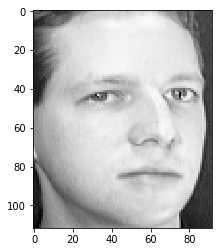

In [170]:
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt


img1 = df_train_x.loc[4]
img1 =  np.reshape(img1.values, (92,112))

plt.imshow(img1.transpose(), cmap=plt.cm.Greys_r)  

In [171]:
from PIL import Image
from resizeimage import resizeimage

def reduit(m,y):
    r=len(m)-1
    c=len(m[0])-1
    return(array([[m[y*i,y*j] for j in range(c/y)] for i in range(r/y)]))

#imshow(reduit(l,5),cmap=cm.gray)

#img2.resize(92,110)

img_2 = np.resize(img2, (60,70))
plt.imshow(img_2)

NameError: name 'img2' is not defined

In [ ]:
c = 0
d = 2

for cocou in range(0,100, 2):
    i = range(c+2,d+2)
    a = range(0,320)
    #print(df_train_x.loc[a,i])

df_train_x_test = []   
for a in range(0,100,2):
    i = range(1,320)
    df_train_x_test.append(df_train_x.loc[i,[a,b]].mean(1))


In [ ]:
df_train_x_test = []

#for a,b,i in range(0,10,2), range(1,10,2), range(0,10):
#b = range(1,100,2)
#i = range(0,320)
#    df_train_x_test.append(df_test_x.loc[i,[a,b]].mean(1))

#df_train_x.loc[i,[0,1]].mean(1)


#df_train_x

df_train_x_test = []
def reduce(a,b,i):
    df_train_x_test.append(df_test_x.loc[i,[a,b]].mean(1))
    
a = range(0,10,2)
b = range(1,10,2)
i = range(0,320)
reduce(a,b,i)

In [ ]:
df_train_x.loc(1,4)

df_train_x_reduce = []
for i in range(1,len(df_train_x.loc[0]/2)):
    df_train_x_reduce = df_train_x_reduce.append(np.mean(df_train_x,i))
    
#df_train_x.loc[0,0]


In [ ]:
ligne = range(0,320)
a = range(0,100,2)
b = range(1,100,2)

liste = pd.DataFrame(zeros(100,100))
#for a in range(1,10):
#    df_coucou = list.add(df_train_x.loc[ligne,[a]])
#df_coucou
liste

In [ ]:
liste = []
ligne = range(320)
coucouhello = df_train_x.values

for a in range(0,100,2):
    liste.append(coucouhello[1, [a,a+1]])

# J'ai réussi !!!!

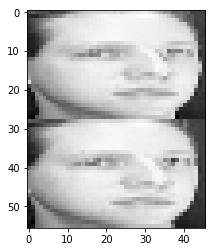

In [172]:
liste = []
ligne = range(320)
coucouhello = df_train_x.values


for a in range(0,len(df_train_x.columns),4):
    liste.append(df_train_x.loc[ligne, [a,a+1,a+2,a+3]].mean(1))

df_train_x_reduce = pd.DataFrame(liste).T

# Plot face 1,

img1 = np.reshape(df_train_x_reduce.loc[4].values, (46,56))

plt.imshow(img1.transpose(), cmap=plt.cm.Greys_r)  

---

In [173]:
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend.


-------------------------------------------------------------------------------------------------------------------
# <span style="color: #850606">**FIN CONTROLE DADOU**</span>  
-------------------------------------------------------------------------------------------------------------------


### 1.6 Error analyses

When a K-Nearest Neigborhood is done **without a PCA**, the accuracy score is **great (~93%)**. The hyperparameter k for the KNN is best with an prime number. 

In another hand, when the face classification is done **with a PCA**, the accuracy score is **very low**, and decrease more the reduction PCA is lower (~15%, ~12%).

### 1.7 Recommendation to improve the model

- No PCA
- Lower PCA (if is done)
- More data
- Do multiple model of clustering classification and do a voting system like boosting on it

### Test with the average face subtracted

In [174]:
df_train_x_2 = df_train_x - face_mean
df_test_x_2 = df_test_x - face_mean

In [175]:
df_train_x_2.head()

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,-0.147066,-0.159216,-0.15989,-0.14360,-0.15608,-0.151572,-0.159388,-0.151352,-0.147887,-0.129145,...,-0.065138,-0.081812,-0.073558,-0.057269,-0.079444,-0.085989,-0.104277,-0.097551,-0.100236,-0.108091
1,-0.100016,-0.108236,-0.06969,-0.02596,-0.14431,-0.167252,-0.131938,-0.131742,-0.116517,-0.054635,...,-0.104348,-0.097502,-0.116688,-0.135699,-0.138274,-0.133049,-0.139567,-0.148531,-0.162976,-0.155151
2,-0.182366,-0.163136,-0.10499,-0.12400,-0.09333,-0.065292,-0.045658,-0.096442,-0.163577,-0.152675,...,-0.096508,-0.109262,-0.124538,-0.139619,-0.142194,-0.144819,-0.170947,-0.168141,-0.178666,-0.174751
3,-0.088246,-0.116076,-0.13244,-0.17890,-0.16784,-0.167252,-0.222128,-0.218012,-0.218477,-0.242867,...,-0.088668,-0.093582,-0.120618,-0.135699,-0.161804,-0.184031,-0.190551,-0.179902,-0.174746,-0.194363
4,-0.084326,-0.100396,-0.08930,-0.12792,-0.10118,-0.175102,-0.218208,-0.225862,-0.187107,-0.121295,...,-0.092588,-0.081812,-0.101008,-0.092559,-0.102974,-0.117369,-0.119967,-0.140691,-0.119836,-0.135541


In [176]:
# Without PCA
Y_pred = my_knn(df_train_x_2, Y_train, df_test_x_2, 5)
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred) * 100, '%')

Accuracy: 93.75 %


In [177]:
# With PCA
knn_pca(50, 5, df_train_x_2, df_test_x_2)

For a reduction dimension of 50 and a k of 5, the accuracy is: 93.75%


**The results are equivalent, it does not seem useful to subtract the average face**

## 2. Exercise 2 (40%)

# Data Mining on Uber data

### Import libraries

In [178]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

### Load data and print info

In [179]:
filename = "../data/Uber_data.csv"
df1 = pd.read_csv(filename, sep=';')
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73890 entries, 0 to 73889
Data columns (total 9 columns):
user        73890 non-null object
fare        73890 non-null float64
product     73890 non-null object
date        73890 non-null object
distance    73890 non-null float64
duration    73890 non-null int64
pickup      59371 non-null float64
start       73890 non-null object
end         73890 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 5.1+ MB
None


## Explore Data

In [180]:
df1.head()

,user,fare,product,date,distance,duration,pickup,start,end
0,male,9.38,uberx,2018-04-18 15:08:14,1.84,720,NaN,37.77 -122.41,37.79 -122.41
1,male,12.32,uberxl,2018-04-18 15:08:14,1.84,720,5.0,37.77 -122.41,37.79 -122.41
2,male,23.86,uberblack,2018-04-18 15:08:14,1.84,720,5.0,37.77 -122.41,37.79 -122.41
3,male,33.75,suv,2018-04-18 15:08:14,1.84,720,5.0,37.77 -122.41,37.79 -122.41
4,male,6.33,rideshare,2018-04-18 15:08:14,1.84,720,2.0,37.77 -122.41,37.79 -122.41


In [181]:
df1.columns

Index(['user', 'fare', 'product', 'date', 'distance', 'duration', 'pickup',
       'start', 'end'],
      dtype='object')

In [182]:
#df1 = df1.rename(index=str, columns={"product": "car"}) #because df as attribut product
#df1.car

In [183]:
print(df1['product'].value_counts())

uberblack    14841
uberxl       14841
suv          14841
uberx        14841
rideshare    14526
Name: product, dtype: int64


In [184]:
print(df1['user'].value_counts())

male      37631
female    36259
Name: user, dtype: int64


In [185]:
print(df1['distance'].value_counts())

2.00    43316
1.84    27292
1.98     2879
2.04      386
2.09       17
Name: distance, dtype: int64


### Proportion of male / female client

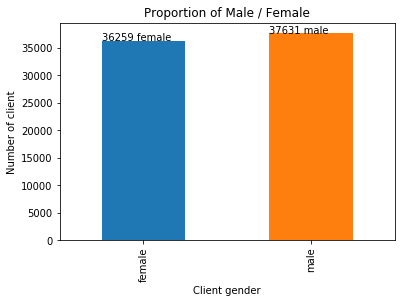

In [186]:
gender = df1.groupby('user')
data_gender = gender['user'].count()
data_gender.plot.bar()
plt.title("Proportion of Male / Female")
plt.annotate(str(data_gender[0]) + " female", (-0.25, data_gender[0]))
plt.annotate(str(data_gender[1]) + " male", (0.75, data_gender[1]))
plt.ylabel("Number of client")
plt.xlabel("Client gender")
plt.show()

### Proportion of gender according to product

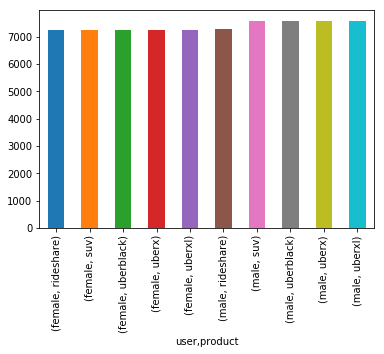

In [187]:
tmp = df1[['user', 'product']]
data = tmp.groupby(['user','product']).size()
data.plot.bar()
plt.show()

### Average fare according to uber product

product
rideshare     5.985478
suv          32.517371
uberblack    22.581474
uberx         9.511324
uberxl       11.952087
Name: fare, dtype: float64


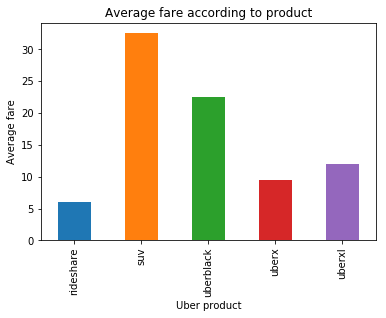

In [188]:
product = df1.groupby('product')
data_product = product['fare'].mean()
print(data_product)
data_product.plot.bar()
plt.title("Average fare according to product")
plt.ylabel("Average fare")
plt.xlabel("Uber product")
plt.show()

### Correlation between fare, distance and duration

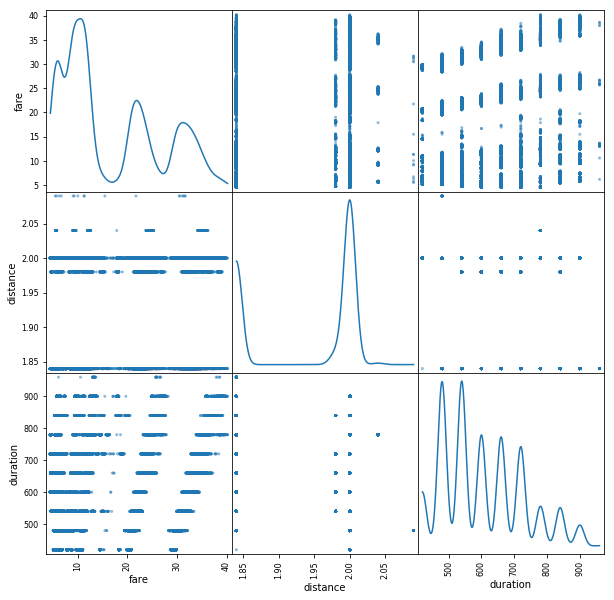

In [189]:
data = df1[['fare', 'distance', 'duration']]
pd.plotting.scatter_matrix(data, figsize=(10, 10), diagonal='kde')
plt.show()

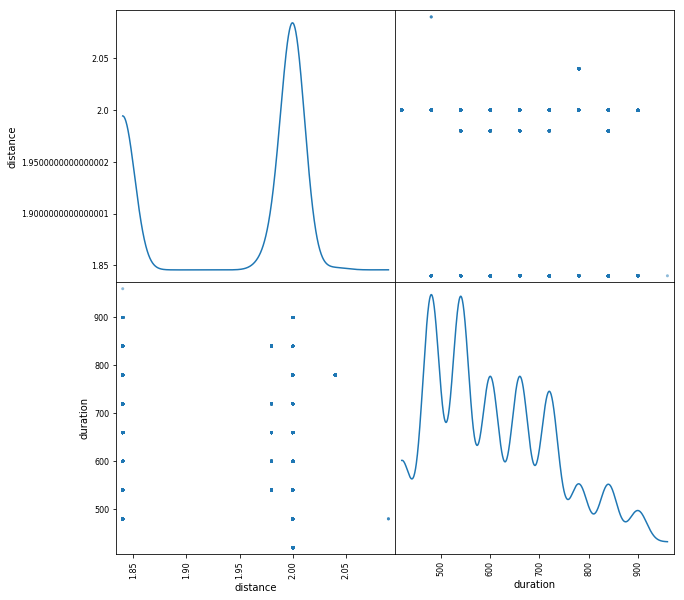

In [190]:
data = df1.loc[df1['product'] == 'uberx']
data = data[['distance', 'duration']]
pd.plotting.scatter_matrix(data, figsize=(10, 10), diagonal='kde')
plt.show()

### Does female uses uber for longer distance than male?

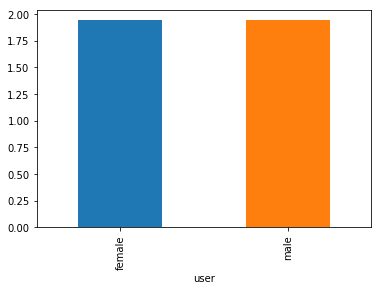

In [191]:
data = df1[['user', 'distance']]
data_gb = data.groupby('user')
data_dst = data_gb['distance'].mean()
data_dst.plot.bar()
plt.show()

### Does exit a correlation between fare and time?

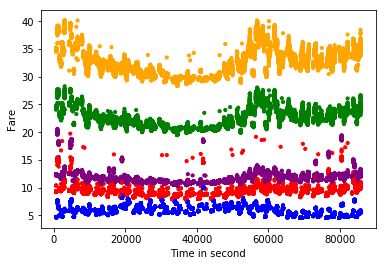

In [192]:
data = df1[['fare', 'date', 'product']]

def date_to_clock(date):
    date = date.split(' ')[1].split(':')
    second = int(date[0]) * 3600 + int(date[1]) * 60 + int(date[2])
    return second

def color_product(product):
    color_dict = {'rideshare':'blue', 'suv':'orange', 'uberblack':'green', 'uberx':'red', 'uberxl':'purple'}
    return color_dict[product]

plt.scatter(data.date.apply(date_to_clock), data.fare, s=10, c=data['product'].apply(color_product))
plt.xlabel('Time in second')
plt.ylabel('Fare')
plt.show()

The fare seem to be correlated with the date. For example, the price is highest at night and in the afternoon.

#### Let's do a logistic regression on SUV product, with fare and time

We only want to work on SUV product.

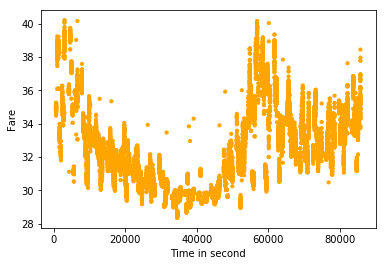

In [193]:
data = df1[['fare', 'date', 'product']]
data = data.loc[data['product'] == 'suv']

plt.scatter(data.date.apply(date_to_clock), data.fare, s=10, c=data['product'].apply(color_product))
plt.xlabel('Time in second')
plt.ylabel('Fare')
plt.show()

[[54494]
 [54494]
 [54494]
 ...
 [49955]
 [53573]
 [57187]]
[33.75 33.88 35.11 ... 30.84 33.03 36.42]


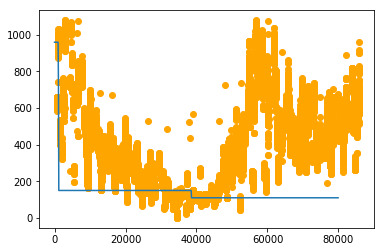

In [194]:
X = data.date.apply(date_to_clock).values.reshape(-1, 1)
Y = data.fare.values

lab_enc = preprocessing.LabelEncoder()
Y_encoded = lab_enc.fit_transform(Y)

print(X)
print(Y)

logr = LogisticRegression()
logr.fit(X, Y_encoded)

plt.scatter(X, Y_encoded, c='orange')

test = np.arange(0, 80000, 100).reshape(-1, 1)
plt.plot(test, logr.predict(test))
plt.show()